In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [3]:
# Read in the data
df = pd.read_csv(r'C:\Users\crae1\Documents\GWG\CrossFitGamesData\archive\2019_games_athletes.csv')

In [4]:
# Search for missing data
def missing_data_search():
    for col in df.columns:
        percentage_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, percentage_missing))
missing_data_search()

height - 0.0%
affiliateid - 0.09390862944162437%
countryoforiginname - 0.0%
weight - 0.0%
affiliatename - 0.09390862944162437%
status - 0.0%
bibid - 0.0%
competitorid - 0.0%
firstname - 0.0%
gender - 0.0%
age - 0.0%
lastname - 0.0%
countryoforigincode - 0.0025380710659898475%
competitorname - 0.0%
overallrank - 0.0%
overallscore - 0.007614213197969543%
division - 0.0%


In [5]:
# Drop rows with incomplete data
df = df[df['overallscore'].notna()]

In [6]:
# Locate missing country of origin value
nf = df[df['countryoforigincode'].isna()]
print(nf)

     height  affiliateid countryoforiginname  weight    affiliatename status  \
234    1.71      44640.0             Namibia    70.3  Diablo CrossFit    CUT   

    bibid  competitorid firstname gender  age lastname countryoforigincode  \
234   173        106380      Lara      F   31   Erlank                 NaN   

    competitorname overallrank  overallscore division  
234    Lara Erlank          91         -16.0    Women  


In [7]:
# Replace code NA with NM for Namibia
df.at[234, 'countryoforigincode'] = 'NM'

In [8]:
# Research for missing data
missing_data_search()

height - 0.0%
affiliateid - 0.09462915601023018%
countryoforiginname - 0.0%
weight - 0.0%
affiliatename - 0.09462915601023018%
status - 0.0%
bibid - 0.0%
competitorid - 0.0%
firstname - 0.0%
gender - 0.0%
age - 0.0%
lastname - 0.0%
countryoforigincode - 0.0%
competitorname - 0.0%
overallrank - 0.0%
overallscore - 0.0%
division - 0.0%


In [9]:
# Change data type of overall score to int64
df['overallscore'] = df['overallscore'].astype('int64')

In [10]:
# Look for inaccurate data for height and weight
hf = df[df['height'] < 1]
print(hf)

wf = df[df['weight'] < 30]
print(wf)

     height  affiliateid countryoforiginname  weight        affiliatename  \
64     0.15      44696.0               Japan    83.9     BeeGrow CrossFit   
66     0.03      44636.0           Venezuela    76.2         CrossFit 4 L   
83     0.18      44633.0              Panama    83.9  Reebok CrossFit PTY   
184    0.15      44959.0       United States    59.0         CrossFit 915   
227    0.15          NaN  Dominican Republic    55.3                  NaN   
235    0.03      44633.0              Panama    58.1  Reebok CrossFit PTY   
264    0.15      44634.0               Samoa    73.0         CrossFit NWA   
273    0.15      44728.0           Sri Lanka    59.0      CrossFit Ceylon   
279    0.15      44842.0              Canada    88.5         CrossFit RDL   

    status bibid  competitorid  firstname gender  age     lastname  \
64     CUT   171        849478     Shingo      M   32     Moromasa   
66     CUT   141        270266       Omar      M   27     Martinez   
83     CUT   186   

In [11]:
# Drop rows with inaccurate height data
df = df[df['height'] > 1]

In [12]:
# The overall rank column must be converted to the int64 datatype
# The 'T' at the end of the tied rankings has to be dropped

# Converts the overall rank column to the string datatype
df['overallrank'] = df['overallrank'].astype('string')


In [13]:
# Replaces the 'T' with an empty ''
df['overallrank'] = df['overallrank'].str.replace('T', '')

In [14]:
# Converts the overall rank column to the int64 datatype
df['overallrank'] = df['overallrank'].astype('int64')


In [15]:
# Seperate data to look only at the Men's and Women's divisions
men_df = df[df['division'] == 'Men']

women_df = df[df['division'] == 'Women']

In [16]:
# This creates grouped summaries correlating height/weight with overall rank
menheight_df = men_df.groupby('height')['overallrank'].mean()

womenheight_df = women_df.groupby('height')['overallrank'].mean()

menweight_df = men_df.groupby('weight')['overallrank'].mean()

womenweight_df = women_df.groupby('weight')['overallrank'].mean()

<AxesSubplot:title={'center':'Male Athlete Height vs. Average Placing'}, xlabel='Height(m)', ylabel='Mean Ranking'>

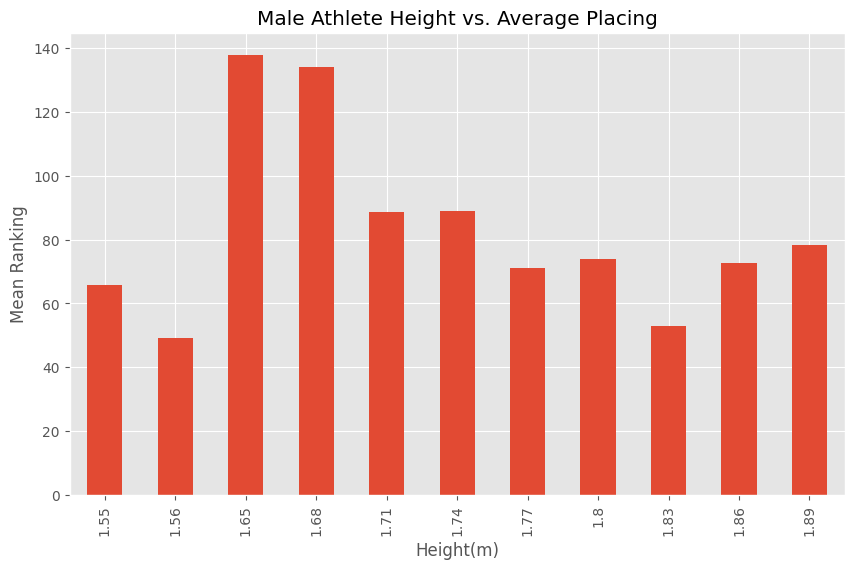

In [20]:
# Plot of men's height vs overall ranking
menheight_df.plot(kind='bar', title='Male Athlete Height vs. Average Placing', ylabel='Mean Ranking', xlabel='Height(m)', figsize=(10,6))

<AxesSubplot:title={'center':'Male Athlete Weight vs. Average Placing'}, xlabel='Weight(kg)', ylabel='Mean Ranking'>

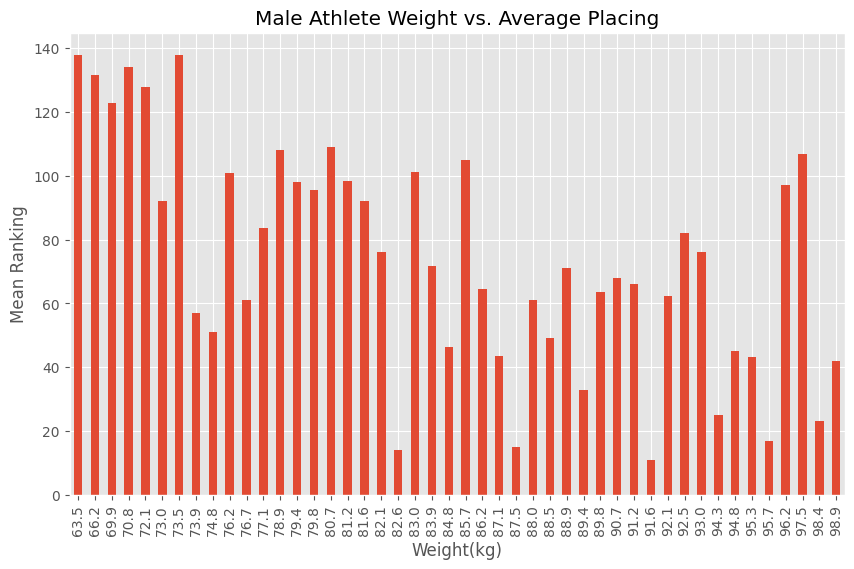

In [19]:
# Plot of men's weight vs overall ranking
menweight_df.plot(kind='bar', title='Male Athlete Weight vs. Average Placing', ylabel='Mean Ranking', xlabel='Weight(kg)', figsize=(10,6))

<AxesSubplot:title={'center':'Female Athlete Height vs. Average Placing'}, xlabel='Height(m)', ylabel='Mean Ranking'>

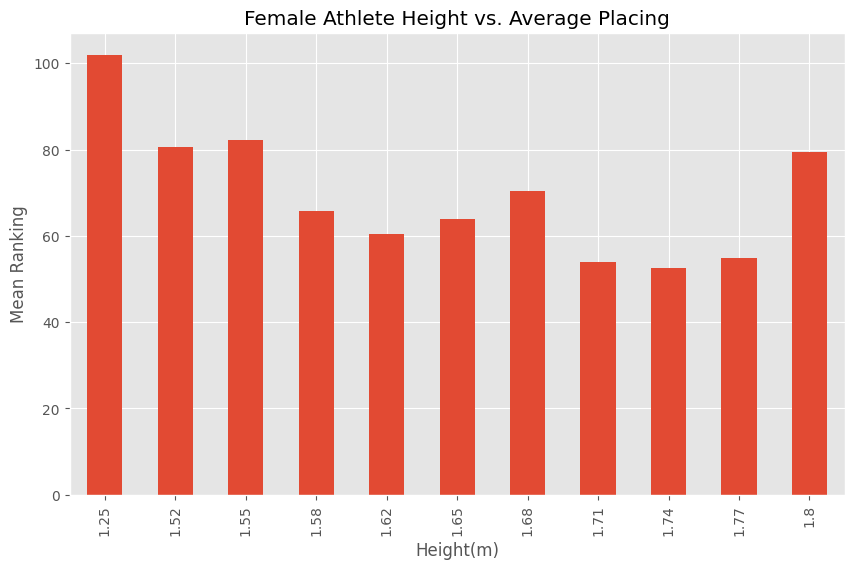

In [21]:
# Plot of women's height vs overall ranking
womenheight_df.plot(kind='bar', title='Female Athlete Height vs. Average Placing', ylabel='Mean Ranking', xlabel='Height(m)', figsize=(10,6))

<AxesSubplot:title={'center':'Female Athlete Weight vs. Average Placing'}, xlabel='Weight(kg)', ylabel='Mean Ranking'>

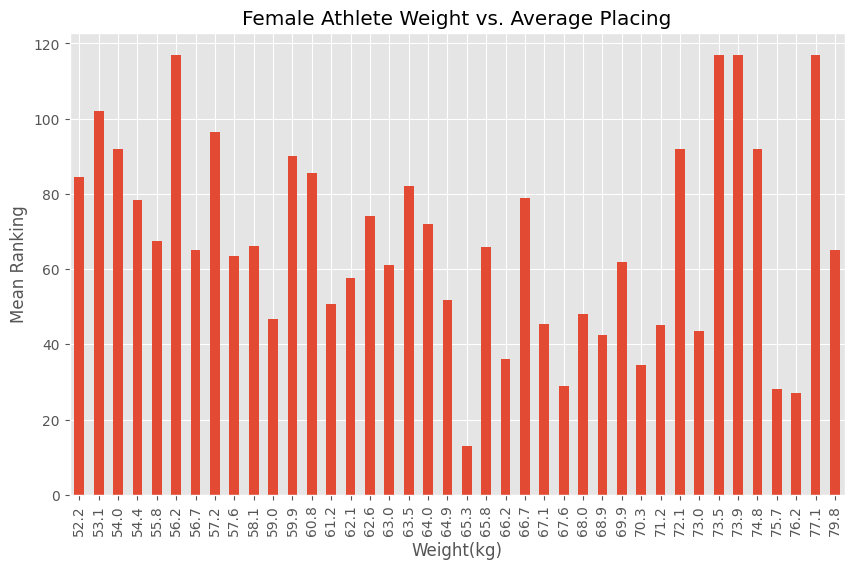

In [22]:
# Plot of women's weight vs overall ranking
womenweight_df.plot(kind='bar', title='Female Athlete Weight vs. Average Placing', ylabel='Mean Ranking', xlabel='Weight(kg)', figsize=(10,6))